# Support-Vector Classifier
Performing support vector classification algorithm on scikit learn default cancer dataset.

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
#Loading Dataset
from sklearn import datasets
breast_cancer = datasets.load_breast_cancer()
print(type(breast_cancer))
breast_cancer.keys()

<class 'sklearn.utils.Bunch'>


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In cancer dataset there is only 2 target classes **Malignant**, **Benign**.

In [5]:
breast_cancer['target_names']

array(['malignant', 'benign'],
      dtype='<U9')

In [10]:
breast_cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='<U23')

Creating pandas dataframe for our feature data.

In [12]:
df = pd.DataFrame(breast_cancer['data'],columns=breast_cancer['feature_names'])
df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [54]:
#Checking Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

Selecting **support vector** model from scikit learn.

In [27]:
#Splitting data into train & test
from sklearn.model_selection import train_test_split
X = df
y = breast_cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)

In [36]:
from sklearn.svm import SVC
classifier = SVC()

### Fitting support vector classifier without specifying parameters
Fitting SV model without specifying **C** and **gamma** is often not a good idea.

In [37]:
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

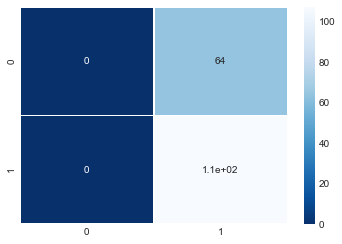

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm, annot=True, linewidths=0.8, cmap = 'Blues_r');

There seems to be something wrong with our classifier, it is only predicting **malignancy**.

### Grid search to the rescue
Scikit learn GridSearchCV is a powerful tool that'll give us the best parameters for our model by testing number of different values.

In [40]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000,],'gamma':[10,1,0.1,0.01,0.001,0.0001]} #GridSearch take dictionary as parameter

In [41]:
grid_svc = GridSearchCV(SVC(),param_grid)
grid_svc.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Getting best parameters and estimator. For more on **GridSearchCV** read the docs [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [43]:
grid_svc.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
grid_svc.best_params_

{'C': 1, 'gamma': 0.001}

### Training model with grid parameters

In [46]:
grid_pred = grid_svc.predict(X_test)
cm = confusion_matrix(y_test,grid_pred)

### Checking Performance
Look our predictions have improved significantly.

             precision    recall  f1-score   support

          0       0.83      0.92      0.87        64
          1       0.95      0.89      0.92       107

avg / total       0.91      0.90      0.90       171



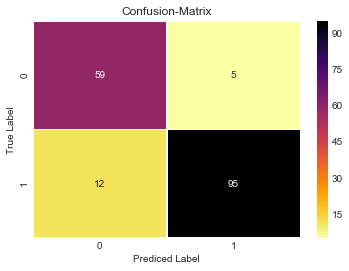

In [53]:
sns.heatmap(cm, annot=True, linewidths=0.8, cmap = 'inferno_r');
plt.title('Confusion-Matrix')
plt.xlabel('Prediced Label')
plt.ylabel('True Label')
print(classification_report(y_test,grid_pred))